# SIGNAL PROCESSING TP4 - M2 AI
## To Do: image denoising in wavelet domain

- Benedictus Kent Rachmat
- Jacobo Ruiz Ocampo

---

## IMPORT

In [42]:
import librosa
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict

In [43]:
def add_noise_2D(signal, noise, snr_db):
    """
    Add noise to a 2D signal with a given SNR value
    Args:
        signal: The clean 2D signal.
        noise: The 2D noise signal.
        snr_db: Desired SNR in dB.
    Returns:
        Noisy 2D signal.
    """

    # Calculate root mean square value of signal and noise
    signal_rms = np.sqrt(np.mean(signal**2))
    noise_rms = np.sqrt(np.mean(noise**2))
    
    # Calculate the scaling factor for noise
    scale_factor = signal_rms / (10 ** (snr_db / 10) * noise_rms)
    
    # Scale the noise and add it to the signal
    noisy_signal = signal + scale_factor * noise
    return noisy_signal

def reshape_noise_to_image(noise, shape):
    """
    Reshape 1D noise to match image dimensions
    """
    reshaped_noise = np.interp(
        np.linspace(0, len(noise), shape[0] * shape[1]),
        np.arange(len(noise)),
        noise
    ).reshape(shape[0], shape[1])
    reshaped_noise = np.repeat(reshaped_noise[:, :, np.newaxis], 3, axis=2)
    return reshaped_noise

In [41]:
SNR_LEVELS = [20,10,0]
NOISES = ["noise1.wav", "noise2.wav", "noise3.wav"]
noise_data = [librosa.load(noise_file)[0] for noise_file in NOISES]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


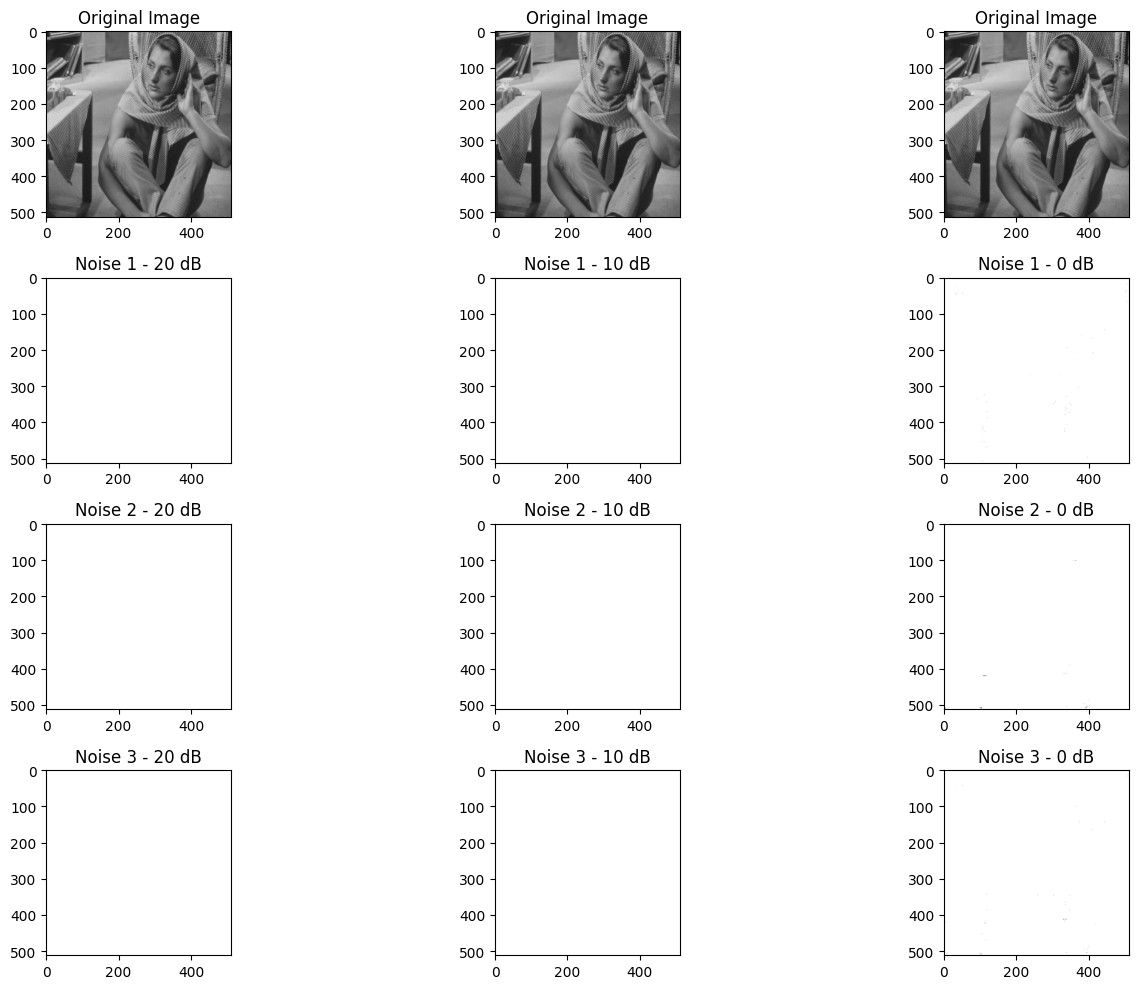

In [48]:
# Load the image
barbara_img = Image.open('barbara.jpg')
image_array = np.array(barbara_img)
image_shape = image_array.shape

noisy_images = defaultdict(dict)
for nos_path in NOISES:
    noise_data, _ = librosa.load(nos_path, sr=None)
    reshaped_noise = reshape_noise_to_image(noise_data, image_shape)

    for snr in SNR_LEVELS:
        noisy_images[nos_path][snr] = add_noise_2D(image_array, reshaped_noise, snr)

# Display the images
fig, axs = plt.subplots(len(NOISES)+1, len(SNR_LEVELS), figsize=(15, 10))

# Original image
for ax in axs[0]:
    ax.imshow(image_array, cmap='gray')
    ax.set_title('Original Image')

# Noisy images
for i, ax_row in enumerate(axs[1:]):
    for j, ax in enumerate(ax_row):
        ax.imshow(noisy_images[NOISES[i]][SNR_LEVELS[j]], cmap='gray')
        ax.set_title(f"Noise {i+1} - {SNR_LEVELS[j]} dB")

plt.tight_layout()
plt.show()